«Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.<br>

Нам необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.<br>

Описание тарифов<br>

Тариф «Смарт»<br>
Ежемесячная плата: 550 рублей<br>
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика<br>
Стоимость услуг сверх тарифного пакета:<br>
минута разговора: 3 рубля<br>
сообщение: 3 рубля<br>
1 Гб интернет-трафика: 200 рублей<br>

Тариф «Ультра»<br>
Ежемесячная плата: 1950 рублей<br>
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика<br>
Стоимость услуг сверх тарифного пакета:<br>
минута разговора: 1 рубль<br>
сообщение: 1 рубль<br>
1 Гб интернет-трафика: 150 рублей<br>

«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.<br>

Описание данных<br>

Таблица users (информация о пользователях):<br>
user_id — уникальный идентификатор пользователя<br>
first_name — имя пользователя<br>
last_name — фамилия пользователя<br>
age — возраст пользователя (годы)<br>
reg_date — дата подключения тарифа (день, месяц, год)<br>
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)<br>
city — город проживания пользователя<br>
tariff — название тарифного плана<br>

Таблица calls (информация о звонках):<br>
id — уникальный номер звонка<br>
call_date — дата звонка<br>
duration — длительность звонка в минутах<br>
user_id — идентификатор пользователя, сделавшего звонок<br>

Таблица messages (информация о сообщениях):<br>
id — уникальный номер сообщения<br>
message_date — дата сообщения<br>
user_id — идентификатор пользователя, отправившего сообщение<br>

Таблица internet (информация об интернет-сессиях):<br>
id — уникальный номер сессии<br>
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)<br>
session_date — дата интернет-сессии<br>
user_id — идентификатор пользователя<br>

Таблица tariffs (информация о тарифах):<br>
tariff_name — название тарифа<br>
rub_monthly_fee — ежемесячная абонентская плата в рублях<br>
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату<br>
messages_included — количество сообщений в месяц, включённых в абонентскую плату<br>
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)<br>
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)<br>
rub_per_message — стоимость отправки сообщения сверх тарифного пакета<br>
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)<br>

### Содержание
### [1. Открытие и изучение файлов](#section_id1)
### [2. Подготовка данных](#section_id2)
### [3. Анализ данных](#section_id3)
### [4. Проверка гипотез](#section_id4)
### [5. Вывод](#section_id5)

<a id='section_id1'></a>

# 1. Открытие и изучение файлов

In [1]:
#импортируем необходимые библиотеки
import numpy as np
import pandas as pd
from datetime import datetime
from scipy import stats as st

In [2]:
df_users = pd.read_csv('/datasets/users.csv')
df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [3]:
df_calls = pd.read_csv('/datasets/calls.csv')
df_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [4]:
df_internet = pd.read_csv('/datasets/internet.csv')
df_internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [5]:
df_mes = pd.read_csv('/datasets/messages.csv')
df_mes

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [6]:
df_tar = pd.read_csv('/datasets/tariffs.csv')
df_tar

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


По информации из датафрейм юзеры видим, что в столбце churn_date (дата прекращения использования тарифом) только 38 человек из 500 перешли на новый тариф

In [8]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [9]:
df_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Среднее время разговоров почти 7 мин, по медиане 6 мин за сессию (также видим, что есть сессии, когда длительность звонков равна нулю, необходимо проверить данные значения)

In [10]:
df_internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


В среднем используется 370 Мб интернета за сессию

<a id='section_id2'></a>

# 2. Подготовка данных

In [11]:
df_calls['duration'].value_counts()

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64

In [12]:
df_calls_unique = df_calls['user_id'].unique()

In [13]:
#данная функция необходима для заполнения нулевых ячеек медианой, так как мы имеем 39613 строк с нулевыми значениями
#, что настораживает (телефон это неотъемлемая часть человека и даже минуту в день он должен был проговорить)
for i in df_calls_unique:
    df_calls.loc[(df_calls['user_id']==i) & (df_calls['duration']==0), 'duration'] = df_calls[df_calls['user_id']==i]['duration'].median()

In [14]:
df_calls['duration'].value_counts()

6.09     1132
5.92      831
5.99      808
5.96      704
6.28      611
         ... 
26.05       1
25.91       1
24.28       1
24.70       1
24.07       1
Name: duration, Length: 3024, dtype: int64

In [15]:
#напишем функцию для округления длительность звонков и интернет трафик в большую сторону 
#(т.к. даже если человек поговорил 1 секунду, с него все равно спишут 1 минуту)
def round_number (data, column):
    data[column] = data[column] + 0.5
    return (data.round())

In [16]:
df_calls = round_number(df_calls, 'duration')
df_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,6.0,1000
1,1000_1,2018-08-17,6.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499
202603,1499_216,2018-10-18,19.0,1499
202604,1499_217,2018-11-10,11.0,1499
202605,1499_218,2018-10-06,5.0,1499


In [17]:
df_internet['mb_used'].value_counts()

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

In [18]:
df_internet_unique = df_internet['user_id'].unique()

In [19]:
#данная функция необходима для заполнения нулевых ячеек медианой, так как мы имеем 19598 строк с нулевыми значениями
#заменим медианой
for i in df_internet_unique:
    df_internet.loc[(df_internet['user_id']==i) & (df_internet['mb_used']==0), 'mb_used'] = df_internet[df_internet['user_id']==i]['mb_used'].median()

In [20]:
df_internet['mb_used'].value_counts()

293.660    149
289.630    141
319.765    133
291.560    128
303.180    128
          ... 
817.520      1
49.400       1
455.270      1
169.620      1
3.000        1
Name: mb_used, Length: 70177, dtype: int64

In [21]:
df_internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,268.24,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [22]:
#округлим в большую сторону
df_internet = round_number(df_internet, 'mb_used')
df_internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113.0,2018-11-25,1000
1,1,1000_1,1053.0,2018-09-07,1000
2,2,1000_2,1198.0,2018-06-25,1000
3,3,1000_3,551.0,2018-08-22,1000
4,4,1000_4,303.0,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,319.0,2018-10-03,1499
149392,149392,1499_153,491.0,2018-12-14,1499
149393,149393,1499_154,269.0,2018-10-27,1499
149394,149394,1499_155,1247.0,2018-11-26,1499


In [23]:
#прежде чем считать кол-во звонков, смс и интернета по месяцам, преобразуем дату в тип datetime и извлечем отдельно месяц
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%dT%H:%M:%S')
df_calls['month'] = df_calls['call_date'].dt.month

In [24]:
df_mes['message_date'] = pd.to_datetime(df_mes['message_date'], format='%Y-%m-%dT%H:%M:%S')
df_mes['month'] = df_mes['message_date'].dt.month

In [25]:
#удалим столбец Unnamed: 0 (тем более даже по условию задачи его нет)
df_internet = df_internet.drop(['Unnamed: 0'], axis = 1)

In [26]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%dT%H:%M:%S')
df_internet['month'] = df_internet['session_date'].dt.month

In [27]:
#нам необходимо определить кол-во сделанных звонков и израсходованных минут, кол-во сообщений и кол-во интернет трафика по месяцам
df_calls_total = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
df_calls_total

count      sum
              duration duration
user_id month                  
1000    5           22    189.0
        6           43    262.0
        7           47    376.0
        8           52    469.0
        9           58    539.0
...                ...      ...
1498    10          41    324.0
1499    9            9     77.0
        10          68    617.0
        11          74    696.0
        12          69    583.0

[3174 rows x 2 columns]

In [28]:
df_mes_total = df_mes.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc=['count'])
df_mes_total

count
              message_date
user_id month             
1000    5               22
        6               60
        7               75
        8               81
        9               57
...                    ...
1498    10              42
1499    9               11
        10              48
        11              59
        12              66

[2717 rows x 1 columns]

In [29]:
df_internet_total = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['sum'])
df_internet_total

sum
               mb_used
user_id month         
1000    5       2783.0
        6      25892.0
        7      14543.0
        8      15124.0
        9      15635.0
...                ...
1498    10     23544.0
1499    9       2117.0
        10     21844.0
        11     20674.0
        12     14422.0

[3203 rows x 1 columns]

In [30]:
#приведем наименование столбцов к нормальному виду
df_calls_total.columns = ['call_count_month', 'duration_total_month']
df_mes_total.columns = ['message_month']
df_internet_total.columns = ['internet_traffic_month']

In [31]:
#объединим 3 таблицу в одну
df_pivot_table_total = df_calls_total.join(df_internet_total, on=['user_id', 'month'])
df_pivot_table_total = df_pivot_table_total.join(df_mes_total, on=['user_id', 'month'])
df_pivot_table_total

call_count_month  duration_total_month  internet_traffic_month  \
user_id month                                                                   
1000    5                    22                 189.0                  2783.0   
        6                    43                 262.0                 25892.0   
        7                    47                 376.0                 14543.0   
        8                    52                 469.0                 15124.0   
        9                    58                 539.0                 15635.0   
...                         ...                   ...                     ...   
1498    10                   41                 324.0                 23544.0   
1499    9                     9                  77.0                  2117.0   
        10                   68                 617.0                 21844.0   
        11                   74                 696.0                 20674.0   
        12                   69                 583.0                 14422.0   

               message_month  
user_id month                 
1000    5               22.0  
        6               60.0  
        7               75.0  
        8               81.0  
        9               57.0  
...                      ...  
1498    10              42.0  
1499    9               11.0  
        10              48.0  
        11              59.0  
        12              66.0  

[3174 rows x 4 columns]

In [32]:
df_pivot_table_total = df_pivot_table_total.reset_index(level='month')

In [33]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [34]:
#добавим в нашу сводную таблицу информацию о тарифах для каждого user_id
df_users_unique = df_users['user_id'].unique()

In [35]:
df_pivot_table_total = df_pivot_table_total.merge(df_users, on='user_id', how='left')    

In [36]:
df_pivot_table_total

,user_id,month,call_count_month,duration_total_month,internet_traffic_month,message_month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22,189.0,2783.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43,262.0,25892.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47,376.0,14543.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52,469.0,15124.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58,539.0,15635.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,1498,10,41,324.0,23544.0,42.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
3170,1499,9,9,77.0,2117.0,11.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
3171,1499,10,68,617.0,21844.0,48.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart
3172,1499,11,74,696.0,20674.0,59.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


In [37]:
df_pivot_table_total = df_pivot_table_total.drop(['age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date'], axis=1)

In [38]:
df_pivot_table_total

,user_id,month,call_count_month,duration_total_month,internet_traffic_month,message_month,tariff
0,1000,5,22,189.0,2783.0,22.0,ultra
1,1000,6,43,262.0,25892.0,60.0,ultra
2,1000,7,47,376.0,14543.0,75.0,ultra
3,1000,8,52,469.0,15124.0,81.0,ultra
4,1000,9,58,539.0,15635.0,57.0,ultra
...,...,...,...,...,...,...,...
3169,1498,10,41,324.0,23544.0,42.0,smart
3170,1499,9,9,77.0,2117.0,11.0,smart
3171,1499,10,68,617.0,21844.0,48.0,smart
3172,1499,11,74,696.0,20674.0,59.0,smart


In [39]:
df_pivot_table_total.describe()

,user_id,month,call_count_month,duration_total_month,internet_traffic_month,message_month
count,3174.000000,3174.000000,3174.000000,3174.000000,3163.000000,2678.000000
mean,1251.555766,8.311594,63.833333,537.901071,19205.956371,45.134802
std,144.470630,2.910625,32.678036,277.788249,7976.912948,34.431280
min,1000.000000,1.000000,1.000000,1.000000,307.000000,1.000000
25%,1126.000000,6.000000,41.000000,342.250000,14261.500000,19.000000
50%,1254.000000,9.000000,63.000000,526.000000,19193.000000,38.000000
75%,1378.000000,11.000000,83.000000,694.000000,23898.500000,63.000000
max,1499.000000,12.000000,244.000000,1998.000000,51785.000000,224.000000


In [40]:
df_pivot_table_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3174 entries, 0 to 3173
Data columns (total 7 columns):
user_id                   3174 non-null int64
month                     3174 non-null int64
call_count_month          3174 non-null int64
duration_total_month      3174 non-null float64
internet_traffic_month    3163 non-null float64
message_month             2678 non-null float64
tariff                    3174 non-null object
dtypes: float64(3), int64(3), object(1)
memory usage: 198.4+ KB


In [41]:
df_pivot_table_total

,user_id,month,call_count_month,duration_total_month,internet_traffic_month,message_month,tariff
0,1000,5,22,189.0,2783.0,22.0,ultra
1,1000,6,43,262.0,25892.0,60.0,ultra
2,1000,7,47,376.0,14543.0,75.0,ultra
3,1000,8,52,469.0,15124.0,81.0,ultra
4,1000,9,58,539.0,15635.0,57.0,ultra
...,...,...,...,...,...,...,...
3169,1498,10,41,324.0,23544.0,42.0,smart
3170,1499,9,9,77.0,2117.0,11.0,smart
3171,1499,10,68,617.0,21844.0,48.0,smart
3172,1499,11,74,696.0,20674.0,59.0,smart


В исходной таблице данных по интернет трафику изначально не было (можем оставить так, просто спишем с них абонентскую плату или занулим, чтобы можно было проводить с ними вычисления)

In [42]:
#данная функция считает помесячную выручку по каждому пользователю
def revenue_month(row):
    tariff = row['tariff']
    duration_total_month = row['duration_total_month']
    internet_traffic_month = row['internet_traffic_month']
    message_month = row['message_month']
    total_sum = 0 #данная переменная необходима, если мы превышаем лимит абонентской платы
    #это для тарифа smart
    if tariff == df_tar.loc[0,'tariff_name']:
        #проверяем условие, если все параметры меньше включенного пакета
        if (duration_total_month <= df_tar.loc[0, 'minutes_included']) and (internet_traffic_month <= df_tar.loc[0, 'mb_per_month_included']) and (message_month <= df_tar.loc[0, 'messages_included']):
            return (df_tar.loc[0, 'rub_monthly_fee'])
        else:#если какой-нибудь из 3 параметров превышает лимит по пакету
            if duration_total_month > df_tar.loc[0, 'minutes_included']:#проверяем первое условие (минуты)
                total_sum += (duration_total_month - df_tar.loc[0, 'minutes_included']) * df_tar.loc[0, 'rub_per_minute']
            if internet_traffic_month > df_tar.loc[0, 'mb_per_month_included']:
                dif = (internet_traffic_month - df_tar.loc[0, 'mb_per_month_included']) /1024.0 #определяем сколько Гб потрачено сверх лимита
                dif += 0.5 #для округления в большую сторону
                total_sum += (dif.round() * df_tar.loc[0,'rub_per_gb'])
            if message_month > df_tar.loc[0, 'messages_included']:
                total_sum += (message_month - df_tar.loc[0, 'messages_included']) * df_tar.loc[0,'rub_per_message']
            return (total_sum + df_tar.loc[0, 'rub_monthly_fee'])# плюс абонентская плата
    #это для тарифа ultra
    else:
        if (duration_total_month <= df_tar.loc[1, 'minutes_included']) and (internet_traffic_month <= df_tar.loc[1, 'mb_per_month_included']) and (message_month <= df_tar.loc[1, 'messages_included']):
            return (df_tar.loc[1, 'rub_monthly_fee'])
        else:#если какой-нибудь из 3 параметров превышает лимит по пакету
            if duration_total_month > df_tar.loc[1, 'minutes_included']:#проверяем первое условие (минуты)
                total_sum += (duration_total_month - df_tar.loc[1, 'minutes_included']) * df_tar.loc[1, 'rub_per_minute']
            if internet_traffic_month > df_tar.loc[1, 'mb_per_month_included']:
                dif = (internet_traffic_month - df_tar.loc[1, 'mb_per_month_included']) /1024.0 #определяем сколько Гб потрачено сверх лимита
                dif += 0.5 #для округления в большую сторону
                total_sum += (dif.round() * df_tar.loc[1,'rub_per_gb'])
            if message_month > df_tar.loc[1, 'messages_included']:
                total_sum += (message_month - df_tar.loc[1, 'messages_included']) * df_tar.loc[1,'rub_per_message']
            return (total_sum + df_tar.loc[1, 'rub_monthly_fee'])# плюс абонентская плата        

In [43]:
df_pivot_table_total['revenue_month'] = df_pivot_table_total.apply(revenue_month, axis = 1)

In [44]:
df_pivot_table_total

,user_id,month,call_count_month,duration_total_month,internet_traffic_month,message_month,tariff,revenue_month
0,1000,5,22,189.0,2783.0,22.0,ultra,1950.0
1,1000,6,43,262.0,25892.0,60.0,ultra,1950.0
2,1000,7,47,376.0,14543.0,75.0,ultra,1950.0
3,1000,8,52,469.0,15124.0,81.0,ultra,1950.0
4,1000,9,58,539.0,15635.0,57.0,ultra,1950.0
...,...,...,...,...,...,...,...,...
3169,1498,10,41,324.0,23544.0,42.0,smart,2150.0
3170,1499,9,9,77.0,2117.0,11.0,smart,550.0
3171,1499,10,68,617.0,21844.0,48.0,smart,2301.0
3172,1499,11,74,696.0,20674.0,59.0,smart,2365.0


#  Вывод по шагу 2

На данном шаге мы обнаружили следующие ошибки: в таблице df_calls имеем 39613 значений в столбце duration (длительность звонка в минутах), это очень странно т.к. телефон стал неотъемлемой часть человека и хотя бы минуту в день человек должен проговорить. Также в df_internet имеем 19598 пропущенных значений по столбцу mb_used (хотя тут еще можно понять, многие люди используют кнопочные телефоны и в интернет через него не заходят). В итоге нулевые значения мы заменили на медиану по столбцу duration и mb_used, фильтруя по user_id каждого пользователя.<br>

Для каждого пользователя были посчитаны:<br>
количество сделанных звонков и израсходованных минут разговора по месяцам; <br>
количество отправленных сообщений по месяцам;<br>
объем израсходованного интернет-трафика по месяцам;<br>
помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).<br>

Чтобы все это посчитать все эти значения, для начала мы столбец дата привели к типу datetime и извлекли оттуда номера месяцев. После чего мы через сводные таблицы посчитали все необходимые параметры. Была написана функция для подсчета выручки в зависимости от тарифа (видимо функцию придется оптимизировать, написать еще одну функцию и вызывать ее в функции=)).

<a id='section_id3'></a>

# 3. Анализ данных

Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишите распределения.

In [45]:
#определим среднее кол-во по 3 параметрам, группируя по месяцам и тарифу
df_analys = df_pivot_table_total.pivot_table(index=['month', 'tariff'], values=['duration_total_month', 'internet_traffic_month', 'message_month'])
df_analys = df_analys.round().reset_index()
df_analys

,month,tariff,duration_total_month,internet_traffic_month,message_month
0,1,smart,242.0,9755.0,20.0
1,1,ultra,512.0,13716.0,43.0
2,2,smart,348.0,13386.0,28.0
3,2,ultra,347.0,13612.0,33.0
4,3,smart,457.0,17322.0,36.0
5,3,ultra,579.0,18323.0,48.0
6,4,smart,431.0,15460.0,36.0
7,4,ultra,558.0,18158.0,45.0
8,5,smart,459.0,18087.0,39.0
9,5,ultra,634.0,21025.0,49.0


Видим, что среднее кол-во минут, сообщений и интернет трафика увеличивалось (кол-во пользователей увеличивается)

In [46]:
#tariffs = ['smart', 'ultra']
#variance = np.var(df_pivot_table_total[(df_pivot_table_total['month']==1)&(df_pivot_table_total['tariff']=='smart')]['call_count_month'], ddof=1)
#variance

In [47]:
tariff=['smart','ultra']

In [48]:
month = [1,2,3,4,5,6,7,8,9,10,11,12]

In [49]:
#данный цикл считает дисперсии по 4 значениям (кол-во звонков, длительность звонков, интернет-трафик и сообщения)
for i in tariff:
    for j in month:
        df_analys.loc[(df_analys['tariff']==i) & (df_analys['month']==j), 'variance_estimate_call_count'] = np.var(df_pivot_table_total[(df_pivot_table_total['month']==j)&(df_pivot_table_total['tariff']==i)]['call_count_month'], ddof=1)
        df_analys.loc[(df_analys['tariff']==i) & (df_analys['month']==j), 'variance_estimate_duration_total'] = np.var(df_pivot_table_total[(df_pivot_table_total['month']==j)&(df_pivot_table_total['tariff']==i)]['duration_total_month'], ddof=1)
        df_analys.loc[(df_analys['tariff']==i) & (df_analys['month']==j), 'variance_estimate_message'] = np.var(df_pivot_table_total[(df_pivot_table_total['month']==j)&(df_pivot_table_total['tariff']==i)]['message_month'], ddof=1)
        df_analys.loc[(df_analys['tariff']==i) & (df_analys['month']==j), 'variance_estimate_internet_traffic'] = np.var(df_pivot_table_total[(df_pivot_table_total['month']==j)&(df_pivot_table_total['tariff']==i)]['internet_traffic_month'], ddof=1)

In [50]:
df_analys = df_analys.round()
df_analys

,month,tariff,duration_total_month,internet_traffic_month,message_month,variance_estimate_call_count,variance_estimate_duration_total,variance_estimate_message,variance_estimate_internet_traffic
0,1,smart,242.0,9755.0,20.0,433.0,34736.0,252.0,52919637.0
1,1,ultra,512.0,13716.0,43.0,1734.0,113420.0,765.0,45826590.0
2,2,smart,348.0,13386.0,28.0,645.0,47856.0,440.0,49996699.0
3,2,ultra,347.0,13612.0,33.0,1679.0,121713.0,713.0,119030127.0
4,3,smart,457.0,17322.0,36.0,652.0,48510.0,670.0,41041987.0
5,3,ultra,579.0,18323.0,48.0,2010.0,154214.0,1827.0,133582367.0
6,4,smart,431.0,15460.0,36.0,661.0,46868.0,518.0,40695252.0
7,4,ultra,558.0,18158.0,45.0,1202.0,90580.0,1411.0,97529091.0
8,5,smart,459.0,18087.0,39.0,644.0,46126.0,639.0,45960130.0
9,5,ultra,634.0,21025.0,49.0,1506.0,104493.0,1639.0,108332980.0


In [51]:
df_analys['standard_call_count'] = np.sqrt(df_analys['variance_estimate_call_count'])

In [52]:
df_analys['standard_duration'] = np.sqrt(df_analys['variance_estimate_duration_total'])

In [53]:
df_analys['standard_internet'] = np.sqrt(df_analys['variance_estimate_internet_traffic'])

In [54]:
df_analys['standard_message'] = np.sqrt(df_analys['variance_estimate_internet_traffic'])

In [55]:
df_analys = df_analys.round()

In [56]:
df_analys.head(5)

,month,tariff,duration_total_month,internet_traffic_month,message_month,variance_estimate_call_count,variance_estimate_duration_total,variance_estimate_message,variance_estimate_internet_traffic,standard_call_count,standard_duration,standard_internet,standard_message
0,1,smart,242.0,9755.0,20.0,433.0,34736.0,252.0,52919637.0,21.0,186.0,7275.0,7275.0
1,1,ultra,512.0,13716.0,43.0,1734.0,113420.0,765.0,45826590.0,42.0,337.0,6770.0,6770.0
2,2,smart,348.0,13386.0,28.0,645.0,47856.0,440.0,49996699.0,25.0,219.0,7071.0,7071.0
3,2,ultra,347.0,13612.0,33.0,1679.0,121713.0,713.0,119030127.0,41.0,349.0,10910.0,10910.0
4,3,smart,457.0,17322.0,36.0,652.0,48510.0,670.0,41041987.0,26.0,220.0,6406.0,6406.0
5,3,ultra,579.0,18323.0,48.0,2010.0,154214.0,1827.0,133582367.0,45.0,393.0,11558.0,11558.0
6,4,smart,431.0,15460.0,36.0,661.0,46868.0,518.0,40695252.0,26.0,216.0,6379.0,6379.0
7,4,ultra,558.0,18158.0,45.0,1202.0,90580.0,1411.0,97529091.0,35.0,301.0,9876.0,9876.0
8,5,smart,459.0,18087.0,39.0,644.0,46126.0,639.0,45960130.0,25.0,215.0,6779.0,6779.0
9,5,ultra,634.0,21025.0,49.0,1506.0,104493.0,1639.0,108332980.0,39.0,323.0,10408.0,10408.0


In [57]:
#перед построением гистограмм, необходимо подготовить данные (создать массив с тарифами и массив с 4 параметрами)
rows_tar = ['smart', 'ultra']
rows_param = ['call_count_month', 'duration_total_month', 'internet_traffic_month', 'message_month']

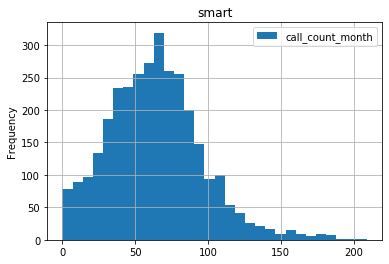

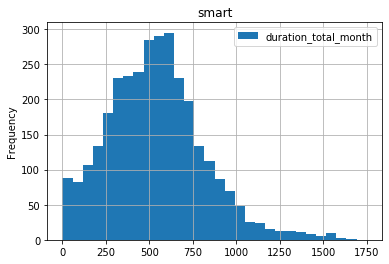

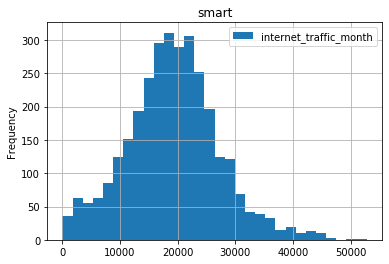

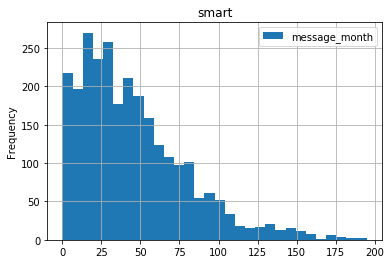

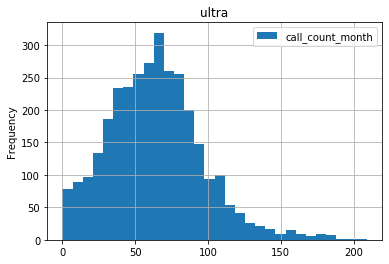

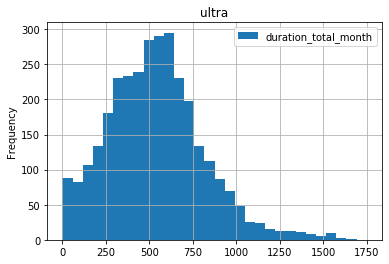

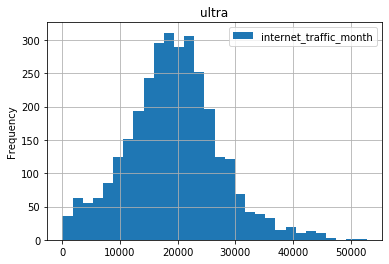

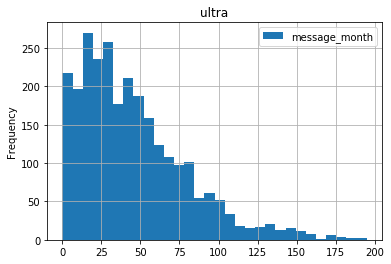

In [58]:
for row_tar in rows_tar:
    for row_param in rows_param:
        data = df_pivot_table_total[['month', row_param]]
        d1 = data.describe()#определяем квантили
        d2 = d1[row_param]#присваиваем столбец новому параметру
        d3 = 3 * (d2[6] - d2[4]) + d2[6]#находим межквартильный размах 
        data.plot(y=row_param, kind='hist', title=row_tar, bins=30, range=(0, d3), grid=True)#строим гистограммы для каждого необходимого параметра

#   Вывод по шагу 3

На данном шаге нами были посчитаны сколько минут разговора, сколько сообщений и какой объём интернет-трафика требовался пользователям каждого тарифа в месяц. Были посчитаны средние значения, дисперсия и стандартное отклонение по месяцам по каждому из тарифов. Были построены гистограммы. Видим, что смсками в наше время практически не пользуются (ни по тарифу смарт ни ультра, все общаются через whatsapp, telegram, viber и т.д.). Некоторым пользователям не хватает пакета смарта по интернет-трафику и кол-вам звонков и они вынуждены доплачивать сверх тарифа (они не готовы переходить на трифу ультра, видимо все равно выходит дешевле, в данном случае можно сделать еще какой-нибудь промежуточный тариф). если брать 3 сигма, то практически все значения входят в данное распределение.

<a id='section_id4'></a>

# 4. Проверка гипотез

На данном шаге необходимо проверить 2 гипотезы:<br>
-средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;<br>
-средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.<br>

Применим гипотезу о равенстве средних двух генеральных совокупностей (тех кто использует тариф смарт и и тех кто использует ультра). Уровень значимости возьмем альфа равной 0.001 т.к. объем нашей выборки больше 3000. 

За нулевую гипотезу примем следующее H0: выручки тарифов пользователей не отличаются; альтернативная гипотеза H1: выручки пользователей тарифов отличаются. Примем уровень значимости alpha = 0.001.

In [59]:
#из сводной таблицы созададим 2 таблицы, группируя по тарифам
df_revenue_smart = df_pivot_table_total[df_pivot_table_total['tariff']=='smart']['revenue_month']
df_revenue_smart

8       1792.0
9        780.0
10       550.0
11      1950.0
12      2150.0
         ...  
3169    2150.0
3170     550.0
3171    2301.0
3172    2365.0
3173     847.0
Name: revenue_month, Length: 2223, dtype: float64

In [60]:
df_revenue_ultra = df_pivot_table_total[df_pivot_table_total['tariff']=='ultra']['revenue_month']
df_revenue_ultra

0       1950.0
1       1950.0
2       1950.0
3       1950.0
4       1950.0
         ...  
3146    1950.0
3147    2550.0
3148    2250.0
3149    3300.0
3150    1950.0
Name: revenue_month, Length: 951, dtype: float64

In [61]:
alpha = 0.05

In [62]:
results = st.ttest_ind(
          df_revenue_smart,
          df_revenue_ultra)

In [63]:
results.pvalue

6.342901862480097e-18

In [64]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Итак, у нас получилось, что выручки очень сильно отличаются в зависимости от выбранного тарифа

За нулевую гипотезу примем следующее H0: средняя выручка по Москве не отличается от других регионов; альтернативная гипотеза H1: средняя выручка по Москве отличается от других регионов. Примем уровень значимости alpha = 0.05.

In [65]:
#прежде чем проверять гипотезу, необходимо добавить в таблицу города
df_pivot_table_total_city = df_pivot_table_total
df_pivot_table_total_city

,user_id,month,call_count_month,duration_total_month,internet_traffic_month,message_month,tariff,revenue_month
0,1000,5,22,189.0,2783.0,22.0,ultra,1950.0
1,1000,6,43,262.0,25892.0,60.0,ultra,1950.0
2,1000,7,47,376.0,14543.0,75.0,ultra,1950.0
3,1000,8,52,469.0,15124.0,81.0,ultra,1950.0
4,1000,9,58,539.0,15635.0,57.0,ultra,1950.0
...,...,...,...,...,...,...,...,...
3169,1498,10,41,324.0,23544.0,42.0,smart,2150.0
3170,1499,9,9,77.0,2117.0,11.0,smart,550.0
3171,1499,10,68,617.0,21844.0,48.0,smart,2301.0
3172,1499,11,74,696.0,20674.0,59.0,smart,2365.0


In [66]:
#добавим столбец city в нашу сводную таблицу
df_pivot_table_total_city = df_pivot_table_total_city.merge(df_users, on='user_id', how='left')    
df_pivot_table_total_city = df_pivot_table_total_city.drop(['age', 'churn_date', 'first_name', 'last_name', 'reg_date', 'tariff_y'], axis=1)
df_pivot_table_total_city

,user_id,month,call_count_month,duration_total_month,internet_traffic_month,message_month,tariff_x,revenue_month,city
0,1000,5,22,189.0,2783.0,22.0,ultra,1950.0,Краснодар
1,1000,6,43,262.0,25892.0,60.0,ultra,1950.0,Краснодар
2,1000,7,47,376.0,14543.0,75.0,ultra,1950.0,Краснодар
3,1000,8,52,469.0,15124.0,81.0,ultra,1950.0,Краснодар
4,1000,9,58,539.0,15635.0,57.0,ultra,1950.0,Краснодар
...,...,...,...,...,...,...,...,...,...
3169,1498,10,41,324.0,23544.0,42.0,smart,2150.0,Владикавказ
3170,1499,9,9,77.0,2117.0,11.0,smart,550.0,Пермь
3171,1499,10,68,617.0,21844.0,48.0,smart,2301.0,Пермь
3172,1499,11,74,696.0,20674.0,59.0,smart,2365.0,Пермь


In [67]:
df_moscow = df_pivot_table_total_city[df_pivot_table_total_city['city']=='Москва']['revenue_month']
df_moscow

8       1792.0
9        780.0
17      1950.0
18      1950.0
19      1950.0
         ...  
3118    1550.0
3119     950.0
3120    2350.0
3121    1750.0
3122     950.0
Name: revenue_month, Length: 610, dtype: float64

In [68]:
df_other = df_pivot_table_total_city[df_pivot_table_total_city['city']!='Москва']['revenue_month']
df_other

0       1950.0
1       1950.0
2       1950.0
3       1950.0
4       1950.0
         ...  
3169    2150.0
3170     550.0
3171    2301.0
3172    2365.0
3173     847.0
Name: revenue_month, Length: 2564, dtype: float64

In [69]:
results_1 = st.ttest_ind(
          df_moscow,
          df_other)

In [70]:
results_1.pvalue

0.6964246788593956

In [71]:
if (results_1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


#   Вывод по шагу 4

На данном шаге мы проверили 2 гипотезы:<br>
-средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;<br>
-средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.<br>
По нашим результатам видим, что средняя выручка пользователей тарифов "Ультра" и "Смарт" различается (в нашем случае подтвердилась альтернативная гипотеза);
Средняя выручка пользователей из Москвы и других регионов не различается (подтвердилась нулевая гипотеза)

<a id='section_id5'></a>

#  5. Общий вывод

В ходе решения данной задачи, нам были представлены 5 файлов с данным пользователей:<br>
users - данные пользователей (ФИО, город, возраст, используемый тариф и т.д.);<br>
calls - информация о звонках пользователей;
internet - информация о интернет-трафиках;<br>
message - информация о сообщениях;<br>
tariff - информация о тарифах<br>
В ходе предобработки данных, были выявлены нулевые значения по звонкам и интернет трафику (данные значения мы зменили медианным значением, ибо в наше время все разговаривают по телефону и нулевых значений просто не может быть)

В ходе предобработки данных была создана сводная таблица, куда попали длительность звонков, интернет трафик и сообщения по месяцам каждого пользователя, а также его тариф. Посчитана помесячная выручка (учитывая абонентскую плату, а также сверх тарифа в зависимости от выбранного тарифа)

В ходе анализа данных, нами были посчитаны сколько минут разговора, сколько сообщений и какой объём интернет-трафика требовался пользователям каждого тарифа в месяц. Посчитаны среднее количество, дисперсия и стандартное отклонение (для этого была подключена библиотека numpy). Построены гистограммы. Судя по гистограммам, графики имелись распределения Пуассона (стремящиеся к нормальному распределнию (особенно видно по интернет-трафику), за исключением гистограмм с сообщениями, они имеют скошенность в положительную сторону, ибо в наше время смсками уже почти никто не пользуется).

Были изучены 2 гипотезы. В итоге выяснилось, что средняя выручка с тарифом "Smart" отличалась от выручки с тарифом "Ultra". А вот средняя выручка по Москве и по другим регионам не отличалась, в данном случае мы не отвергали гипотезу. 

